# <center> Assignment-2 (50 marks)


#General Information

Welcome to Assignment 2! We will be applying the concepts we have learned so far to solve this assignment.Goodluck!

Please fill out your name and email in the below cell


In [29]:
#NAME : Apoorv Thapliyal
#EMAIL : apoorv1009@gmail.com

#Question 1: Choose the right option (3 Marks)

If my velocity is constant 1 m/s @ 45 degree to horizontal, can I escape into the orbit?

> (A) Yes.You will escape

> (B) No.You need a minimum escape velocity i.e. 11.2 km/s, to escape gravity




In [30]:
#Ans (B)
# If our velocity is constantly 1 m/s at a 45-degree angle, we will not be able 
# to escape the gravitational pull of the Earth and enter into orbit. We need a 
# minimum escape velocity of 11.2 km/s to achieve orbit.

#Question 2: Choose the right option (3 Marks)

Considering a uniform gravitational field across the rocket, which one among the following is true to ensure stability in flight?

> (A) Centre of Gravity must be above the centre of mass

> (B) Centre of Pressure must be below the centre of mass

> (C) Centre of Pressure must be above the centre of mass

> (D) Centre of Gravity must be above the centre of pressure


In [31]:
#Ans (D) 
# In stable flight, the rocket's center of gravity must be located above its 
# center of pressure, which is the point where all of the aerodynamic forces can
# be considered to act. This creates a restoring torque, which means that any 
# disturbance in flight will result in a torque that pushes the rocket to its 
# original stable position. If the center of pressure is above the center of 
# gravity, any disturbance could result in instability.

#Question 3: Choose the right answer (3 Marks)

How many Merlin Engines are there in Falcon 9 Rocket?

> 8

> 11

> 9

> 10

In [32]:
#Ans (9)

#Question 4: Choose the right Option (5 Marks)


Suppose you have an automatic heater having a XYZ controller. You switch it on and set the temperature to 80 degrees Celsius (set point). Now the X controller starts warming up the heater from the room temperature, and it overshoots the 80 degrees Celsius (which is desired value) and reaches 85 degrees. Now the Y controller, realizes this and signals the heater to switch off. But then gradually the temperature decreases to 78 degrees. Meanwhile, the Z controller keeps track of the offset (plus or minus) from the set point and signals the heater to adjust accordingly. Thus, XYZ controller tries to keep the temperature near to 80 degrees Celsius.



Now based on the above case, match the XYZ controller's role with PID controller.






> (A)  XYZ == (Proportional,Integral,Derivative)


> (B)  XYZ == (Integral,Proportional,Derivative)


> (C)  XYZ == (Derivative,Proportional,Integral)


> (D)  XYZ == (Proportional,Derivative,Integral)



# Ans

In the given question, it is mentioned that the **Z** controller keeps track of the offset from the setpoint, which can be partly associated with the **Integral** controller. <br>

The question also states that the **X** controller starts warming up the heater from room temperature. This can only be associated with the **Proportional** controller, since the derivative controller alone cannot bring about temperature change, as it acts on the rate of change or error than the absolute error itself. <br>

Moreover the **Y** controller signals the controller to switch off once an overshoot occurs, which can be associated with the **Derivative** controller. Initially the rate of change of error is negative, once it crosses the setpoint, the rate of change of error slowly becomes positive, which is analogous to turning off the heater. It must be noted here that the sign of the rate of change of error doesn't matter, we should focus on the change in behavious of the controller.

Thus the (X,Y,Z) can be matched to (Proportional, Derivative, Integral) <br>
So the answer is **(D)**

#Question 5 (9 marks)

Consider the Rocket Geometry in units given below .And Calculate Cp and Cm w.r.to. top reference line. And Mass of each section is given below,

Nose cone = 50 units

Main Body = 175 units

Triangle Fin = 25 units

Rectangular Fin = 25 units

Nozzle = 60 units

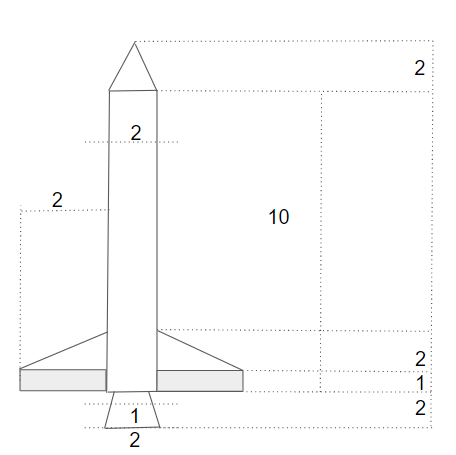

Note: Screenshot should be taken over calculations and Submit those here as well.

In [33]:
#Ans

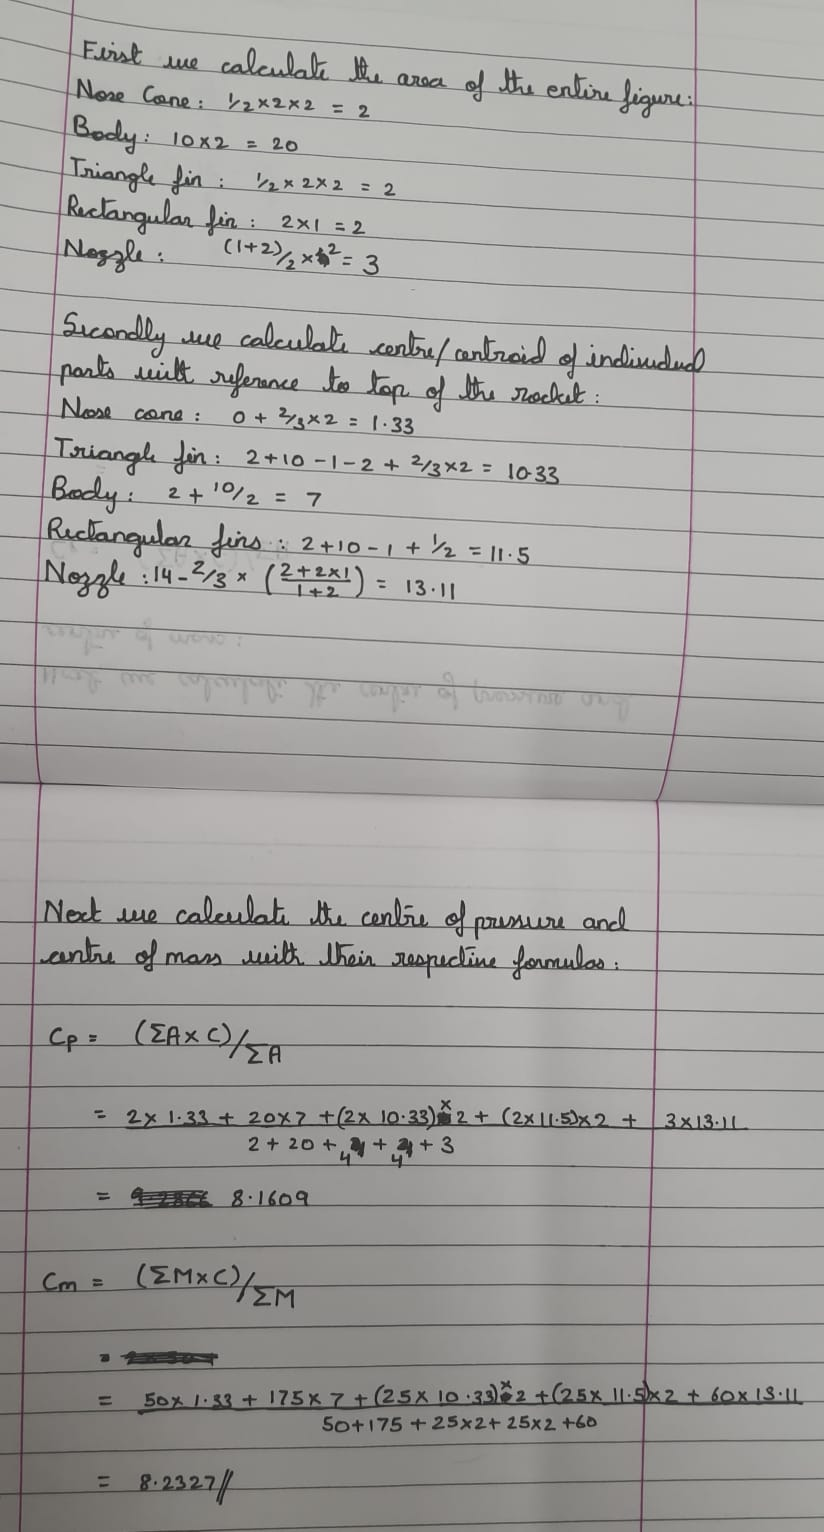

#Question 6 (15 Marks)

Use SymPy to define the fuel loss function as follows,and covert those into numerical python function then plot different ways to expell fuel with repect to 1000 finite timescale (0.0001 to 1) and n = (0.5,1,1.5,2,3,5,7,10).Finally justify which Fuel Loss function is optimal to obtain stable and controlled flight.

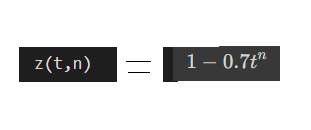



In [34]:
#Ans
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-colorblind', 'seaborn-notebook'])

# Define the fuel loss function
t, n = smp.symbols('t n')
z = 1 - 0.7*t**n
dzdt = smp.diff(z, t).simplify()

# Get the numerical function
z = smp.lambdify([t, n], z)

# Finite timescale 0.0001 to 1
t_eval = np.linspace(1e-4, 1, 1000) 

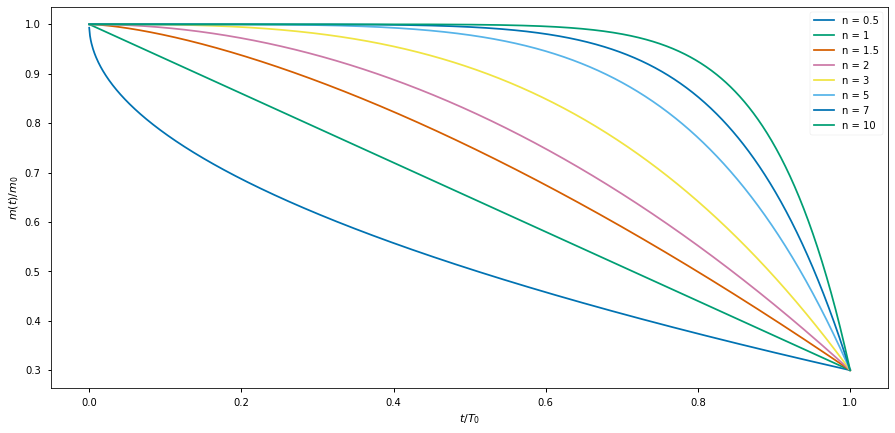

In [35]:
#  Different ways to expell fuel

# define list of n parameter
exp = [0.5, 1, 1.5, 2, 3, 5, 7, 10]

plt.figure(figsize=(15,7))
for N in exp:
  fuel_loss = z(t_eval, N)
  plt.plot(t_eval, fuel_loss, label='n = {}'.format(N))     

plt.ylabel('$m(t)/m_0$')
plt.xlabel('$t/T_0$')
plt.legend(loc='best')
plt.show()

Now we see the fuel loss function contribute to the dynamics of the rocket  
We will define the same ODE system and parameters as used in class:
S⃗ =(x,v)  and  dS⃗ /dt=(dx/dt,dv/dt)

In [36]:
from scipy.integrate import solve_ivp

T0 = 40 # 40 second launch 
g = 9.81
vg = 500 # fuel emitted at 500m/s
M0 = 2e4 #20000kg rocket starting
b = 0.1 # coefficient of air friction
m0 = M0/(b*vg*T0)

# Get the numerical function
dzdt = smp.lambdify([t, n], dzdt)

def dSdt(t,S, m0, vg, n, T0=40):               # S = Initial zero term which carries initial position and initial velocity
    x, v = S[0], S[1]  #Initial position and Velocity
    # If still have fuel left (at t=1 all fuel is expelled)
    if t<1:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(t,n))*v**2 *np.sign(v) - 1/z(t, n) * dzdt(t, n)
    # If out of fuel
    else:
        dxdt = v
        dvdt = -g*T0/vg - 1/(m0*z(1,n))*v**2 *np.sign(v)
    # If accelerating downwards with negative speed while on the ground (can't go through ground)
    if (dvdt<0)*(dxdt<0)*(x<=0):
        dxdt=0
        dvdt=0
    return [dxdt,dvdt]

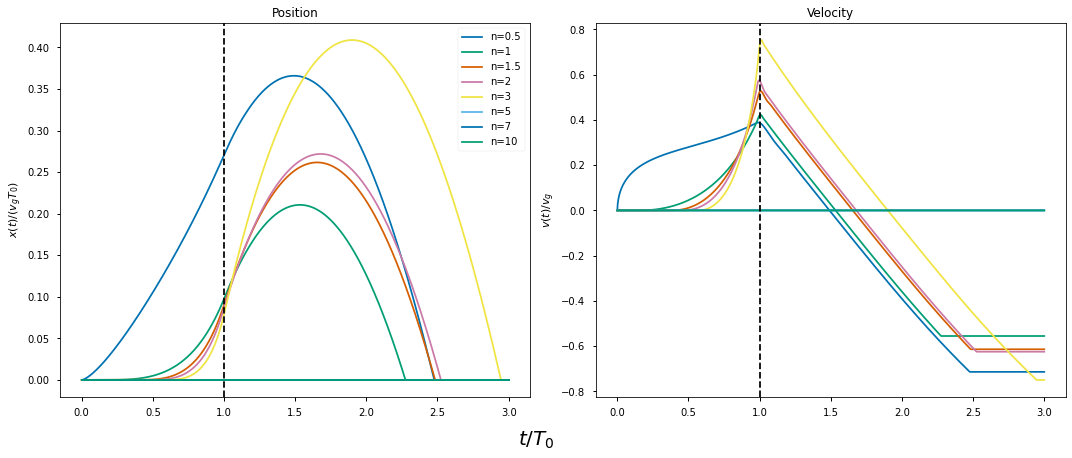

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

for N in exp:
  sol = solve_ivp(dSdt, [1e-4, 3], y0=[0,0], t_eval=np.linspace(1e-4,3,1000), args=(m0, vg, N, T0))
  ax = axes[0]
  ax.plot(sol.t, sol.y[0], label='n={}'.format(N))
  ax = axes[1]
  ax.plot(sol.t, sol.y[1], label='n={}'.format(N))

ax = axes[0]
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$x(t)/(v_g T_0)$')
ax.set_title('Position')
ax.legend()

ax = axes[1]
ax.axvline(1, ls='--', color='k')
ax.set_ylabel('$v(t)/v_g$')
ax.set_title('Velocity')
fig.text(0.5, -0.04, '$t/T_0$', ha='center', fontsize=20)
fig.tight_layout()

Looking at the position and velocity graph, we can make the following inferences:

1. With n = 3, we are able to get the highest altitude
2. With n = 3, we are able to get the highest velocity  
3. With n = 3, the acceleration is extremely high
4. With n = 0.5, it reaches 2nd highest, acceleration is good, very stable

We observe that the velocity is extremely high with n=3, however it would generate an extremely difficult flight as the acceleration is extremely high. Thus in realistic cases, the control input would be highly unstable with the increased velocity. 

With n=0.5, we are able to achieve the penultimate height with a stable acceleration. Thus this would generate a very stable and controlled flight



#Question 7 (12 Marks)
Given Plot is between Horizontal and Vertical displacement of simple projectile with different inclination.Here Gravity and Frictional resistance is considered.Justify those three categoiries with respect to range and stability and also suggest which one is optimal projectile plan.

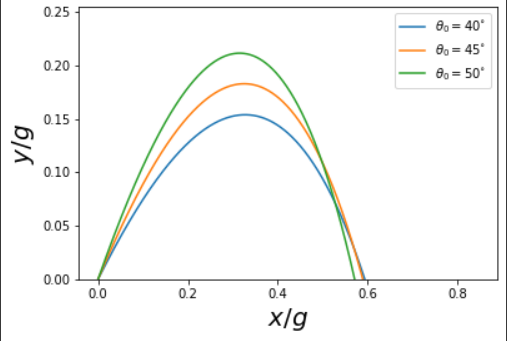

From the given graph, we can infer:

1. θ = 50 gives the projectile the most height, but the least range
2. θ = 40 gives the projectile the most range, but the least height
3. θ = 45 fits between θ = 50 and θ = 40
<br>  

The 3 different ranges can be explained, projectile range and height vary with varying angle because the range and height equations depend on the initial velocity and angle of the projectile. Assuming a constant initial velocity, the range increases with the angle until the angle of maximum range (θ = 45) is reached, while the height increases with the square of the sine of the angle until it reaches its maximum (θ = 90). However the situation changes when we factor in aerial drag. <br>

The drag force acts in the opposite direction to the motion of the projectile, and it reduces the speed of the projectile as it moves through the air. This decrease in speed causes the projectile to take longer to cover the same distance, and it reduces the overall range of the projectile. <br>

Now the θ = 50 achieves the maximum height and least range, which is expected with the steepness of the launch angle. <br>
With θ = 40 and θ = 45, the ranges are almost equal, with the former having the higher range. To compensate for the effect of drag on the projectile, the optimal angle for maximum range needs to be decreased. This is because a lower launch angle reduces the time the projectile spends in the air, which reduces the effect of drag on the projectile while increasing the horizontal component of velocity. <br>








